In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

## Setup Pytrends Library and Keyword

In [77]:
pytrends = TrendReq(hl = 'en-US',tz = 360)
keyword = 'ai'

## Data Request

In [82]:
pytrends.build_payload([keyword],cat = 0,timeframe='today 12-m',geo = '',gprop = '')


## Country Wise Interest

In [85]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword,ascending=False).head(15)

C:\Users\k\AppData\Local\Temp\ipykernel_14036\4256326310.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




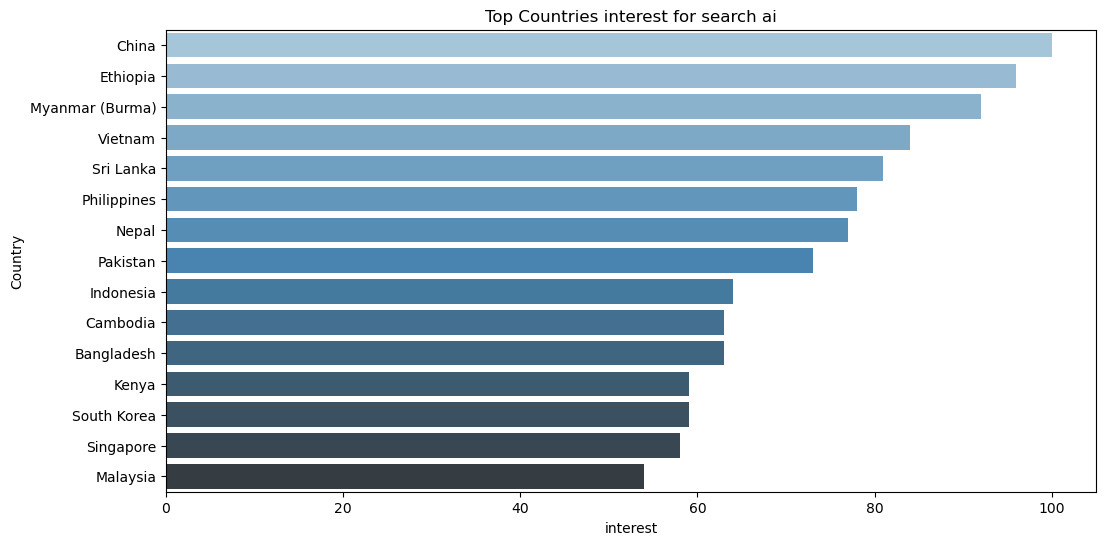

In [87]:
plt.figure(figsize=(12,6))
sns.barplot(x = region_data[keyword],y= region_data.index,palette='Blues_d')
plt.title(f"Top Countries interest for search {keyword}")
plt.xlabel('interest')
plt.ylabel('Country')
plt.show()

## world map

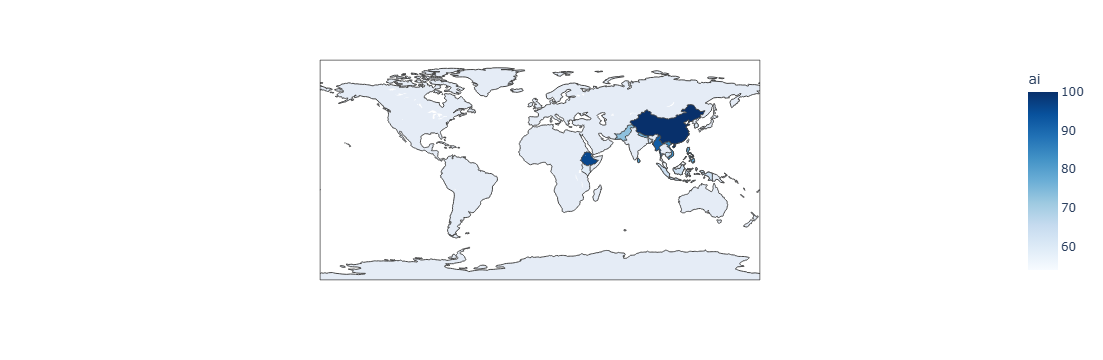

In [91]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                   locations='geoName',
                   locationmode='country names',
                   color=keyword,
                   color_continuous_scale='Blues')
fig.show()

## Time Wise Interest

In [94]:
time_df = pytrends.interest_over_time()

C:\Users\k\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



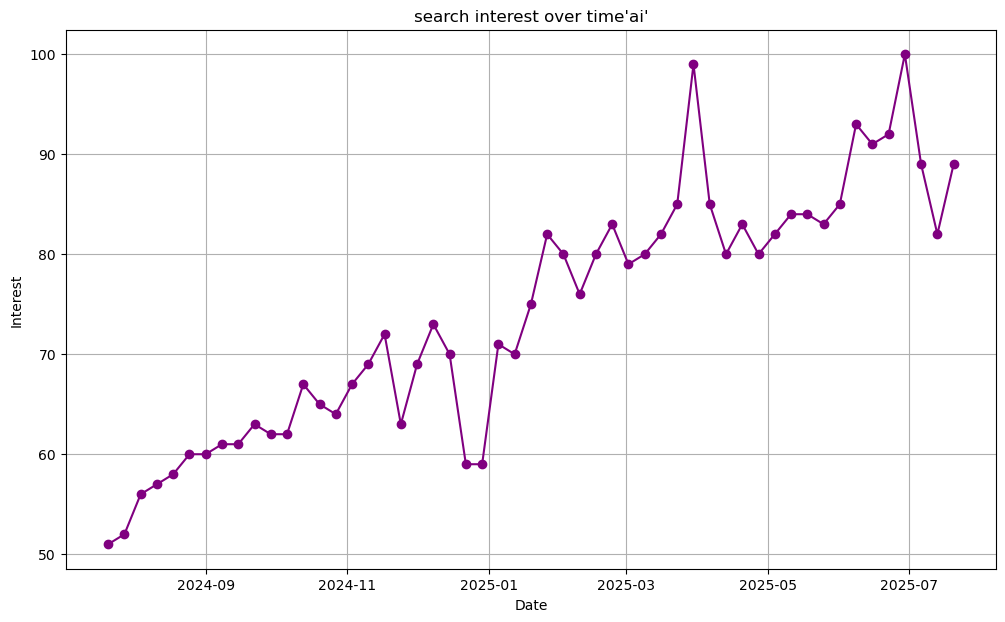

In [98]:
plt.figure(figsize=(12,7))
plt.plot(time_df.index,time_df[keyword],marker = 'o',color = 'purple')
plt.title(f"search interest over time'{keyword}'")
plt.xlabel("Date")
plt.ylabel('Interest')
plt.grid(True)
plt.show()

## Multiple Keywords Compare

In [101]:
kw_list = ['ai','cloud computing','iphone']
pytrends.build_payload(kw_list,cat=0,timeframe='today 12-m',geo='',gprop='')

C:\Users\k\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



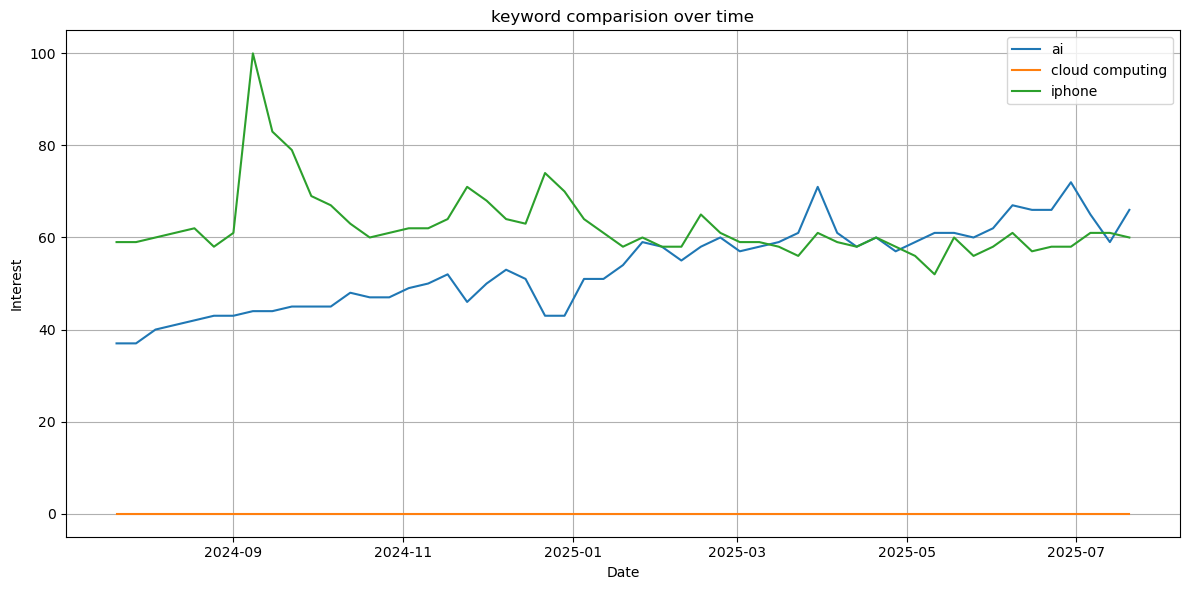

In [105]:
compare_df = pytrends.interest_over_time()
plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index,compare_df[kw],label = kw)
plt.title("keyword comparision over time")
plt.xlabel('Date')
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
